In [4]:
!pip install fastbook
!pip install fastai
!pip install wandb
!pip install ipywidgets
from fastbook import *
from fastai.vision.widgets import *




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 KB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.6/561.6 KB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 KB 4.3 MB/s eta 0:00:00a 

In [19]:
# Define path to images. Path() is a class that takes a string and returns a Path object.
path = Path('imagesm/graylevel/training')
path

Path('imagesm/graylevel/training')

In [28]:
# Get image paths
## get_image_files() returns a list of all the files in the path, recursively by default
fns = get_image_files(path)
print(fns)

!ls

[]
 AAR-DL_old.Rproj              image_building.ipynb*   recu.ipynb*
 analysis/                     images/                 recu_plots.ipynb*
 code/                         images2/               'recuplots paper.pdf'
 data/                         imagesm/                renv/
 dataHARtest/                  MiNE.ipynb              renv.lock
 data-pipeline.drawio          output/                 signaligner-source/
 docs/                         packages.R              _targets/
 fastbook/                     Pipfile                 _targets.R
 functions.ipynb*              R/                      _targets.Rmd
 hello                         README.md               test
 image_building-clean.ipynb*  'rec_net mine.ipynb'*    _workflowr.yml


In [26]:
# Often images can be corrupt. We can verify which of them are corrupt using the verify_images() function.
failed = verify_images(fns)
failed

# There are no failed images, but if there were, we should have to run: 
# ```failed.map(Path.unlink);```

(#0) []

Now we have to turn our data (images) into a format suitable for model training with fastai, which means creating an object called `DataLoaders`, which is a fastai class that stores multiple `DataLoader` objects.
To turn our data into a `DataLoader` object we have to provide fastai with the following information: 
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

In [15]:
# Define `DataBlock` class, which is a template for creating dataloaders
segments = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # tuple specifying what types we want
    # independent and dependent variables. The dependent variable is our target
    get_items=get_image_files, # Recursively return images of a path
    splitter=RandomSplitter(valid_pct=0.2, seed=123), # Split into training and validation
    get_y=parent_label, # Define labels for target
    item_tfms=Resize(128)) # Resize all images to the same size. 

In [16]:
# Tell fastai the path to the images.
## .dataloaders is a method that takes a path
dls = segments.dataloaders(path)
#help(dls)
#??# What is dls exactly? a class? an object?
# Is dls a DataLoader object created from the DataBlock class


TypeError: 'NoneType' object is not iterable

In [11]:
# Show a batch of images that will be used for training
dls.train.show_batch(max_n=12, nrows=2)
# Show a bathc of images that will be used for validation
dls.valid.show_batch(max_n=12, nrows=2)



NameError: name 'dls' is not defined

In [ ]:
# Create our Learner
## cnn_learner() is a function that has to take our DataLoader?
## We also pass `resnet18` as argument so that we can used that pretrained model (transfer learning)
## and we also have to define a metric (a function that measures how well the model is making predictions using the validation set)
### error_rate tells us the percentage of images in the validation set that are being classified INCORRECTLY


learn = vision_learner(dls, resnet18, metrics=accuracy)



# Fine tune our model
## fine_tune() method uses a pretrained model. Fine tuning is a technique to adapt a pretrained model to a new dataset
learn.fine_tune(5) 

epoch,train_loss,valid_loss,accuracy,time
0,0.964665,1.702021,0.472222,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.489330,1.045607,0.661111,00:03
1,0.464540,0.555644,0.797222,00:03
2,0.419417,0.214941,0.927778,00:03
3,0.367531,0.229284,0.913889,00:03
4,0.331091,0.203482,0.930556,00:03


The columns shown above are the average loss over the items of the training set, the loss on the validation set, and any metrics that we requested—in this case

In [ ]:
learn.unfreeze()

SuggestedLRs(valley=5.754399353463668e-06)

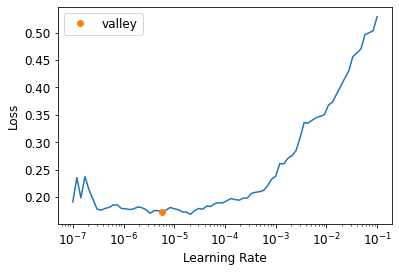

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(6, lr_max=3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.210240,0.192320,0.930556,00:07
1,0.215662,0.199895,0.916667,00:07
2,0.225837,0.204526,0.913889,00:07
3,0.226989,0.210437,0.927778,00:07
4,0.219788,0.210206,0.927778,00:07
5,0.220346,0.208401,0.933333,00:07


SuggestedLRs(valley=2.511886486900039e-05)

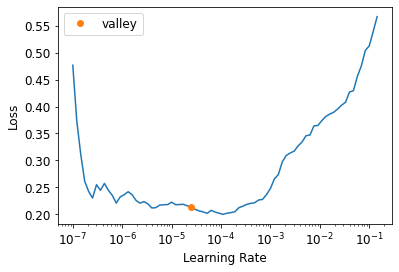

In [36]:
learn.lr_find()

In [37]:
learn.fit_one_cycle(6, lr_max=3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.212860,0.200499,0.933333,00:07
1,0.208527,0.196537,0.916667,00:07
2,0.195218,0.199738,0.927778,00:07
3,0.193989,0.192376,0.936111,00:07
4,0.206172,0.197961,0.938889,00:07
5,0.215704,0.201540,0.933333,00:07


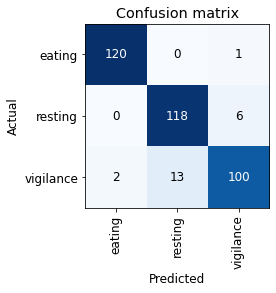

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

IndexError: list index out of range

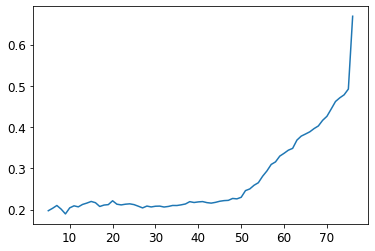

ValueError: not enough values to unpack (expected 2, got 1)

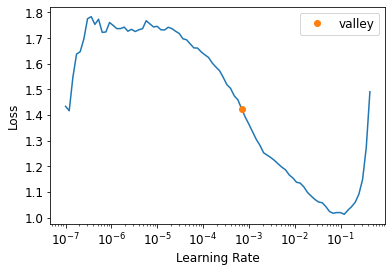

In [15]:
lr_min,lr_steep = learn.lr_find()

In [18]:
learn.fine_tune(10, base_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.233812,1.703372,0.394444,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.684767,0.952937,0.625000,00:07
1,0.618077,0.483629,0.838889,00:07
2,0.534507,0.274550,0.894444,00:07
3,0.472395,0.257171,0.911111,00:07
4,0.419357,0.273711,0.902778,00:07
5,0.401567,0.250523,0.905556,00:07
6,0.373008,0.246541,0.908333,00:07
7,0.364353,0.247921,0.905556,00:07
8,0.336692,0.242173,0.905556,00:07
9,0.329789,0.240753,0.908333,00:07


Overfitting can be seen when the validation accuracy is getting worse during training. 
